# Logistic Regression

Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables. The independent variables can be nominal, ordinal, or of interval type.

The name “logistic regression” is derived from the concept of the logistic function that it uses. The logistic function is also known as the sigmoid function. The value of this logistic function lies between zero and one.

The following is an example of a logistic function we can use to find the probability of a vehicle breaking down, depending on how many years it has been since it was serviced last.

Here is how you can interpret the results from the graph to decide whether the vehicle will break down or not.

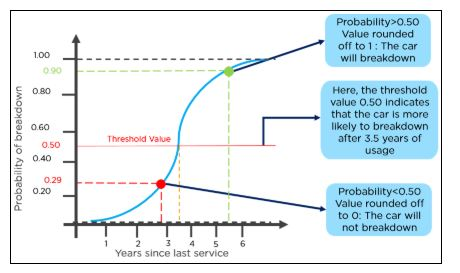

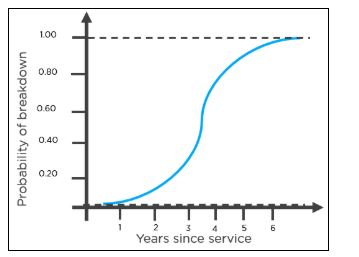

# logistic regression algorithm

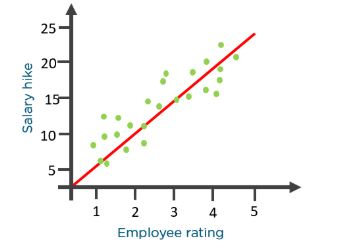

In [46]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:
data = {
    "x" : [0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9],
    "y" : [0, 0, 0, 0, 1, 1, 1, 1]
}
df = pd.DataFrame(data=data)
df

,x,y
0,0.1,0
1,0.2,0
2,0.3,0
3,0.4,0
4,0.6,1
5,0.7,1
6,0.8,1
7,0.9,1


# finding m
$$ m = \frac{(n * \sum_{i=0}^{n} X_{i} * Y_{i}) - (\sum_{i=0}^{n} X * \sum_{i=0}^{n} Y)}{(n*\sum_{i=0}^{n}X^{2}) - (\sum_{i=0}^{n}X)^{2}} $$

In [48]:
df['sum_xy']=df['x']*df['y']
df['sqr_x']=df['x']**2
df

,x,y,sum_xy,sqr_x
0,0.1,0,0.0,0.01
1,0.2,0,0.0,0.04
2,0.3,0,0.0,0.09
3,0.4,0,0.0,0.16
4,0.6,1,0.6,0.36
5,0.7,1,0.7,0.49
6,0.8,1,0.8,0.64
7,0.9,1,0.9,0.81


In [49]:
sum_x=df['x'].sum()
sum_y=df['y'].sum()
sum_xy=df['sum_xy'].sum()
sum_sqr_x=df['sqr_x'].sum()
sum_x_h_2=sum_x **2
n=len(df)

In [50]:
sum_x,sum_y,sum_xy,sum_sqr_x,sum_x_h_2,n

(4.0, 4, 3.0, 2.5999999999999996, 16.0, 8)

In [51]:
numerator = (n*sum_xy) - (sum_x * sum_y)
numerator

8.0

In [52]:
denominator = (n*sum_sqr_x) - sum_x_h_2
denominator

4.799999999999997

In [53]:
m=numerator / denominator
m

1.6666666666666676

# finding b
$$ b = \frac{\sum_{i=0}^{n} Y_{i} - m * \sum_{i=0}^{n} X_{i}}{n} $$

In [54]:
sum_x, sum_y, n,m

(4.0, 4, 8, 1.6666666666666676)

In [55]:
numerator_b = ((sum_y) - (m * sum_x))
denominator_b = n
b = numerator_b / denominator_b
b

-0.3333333333333338

In [56]:
print('m value is :', m)
print('b value is :',b)

m value is : 1.6666666666666676
b value is : -0.3333333333333338


# squared error
$$ ss = \sum_{i=0}^{n} (Y_{org} - y_{pred}) ^ {2} $$

In [57]:
y_org = df['y']
y_org

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
Name: y, dtype: int64

In [58]:
y_pred = [(m*x_val) + b for x_val in df['x']]
y_pred

[-0.16666666666666705,
 -2.7755575615628914e-16,
 0.1666666666666664,
 0.33333333333333326,
 0.6666666666666666,
 0.8333333333333334,
 1.0000000000000004,
 1.166666666666667]

In [59]:
df['y_pred'] = [(m*x_val) + b for x_val in df['x']]
df

,x,y,sum_xy,sqr_x,y_pred
0,0.1,0,0.0,0.01,-1.666667e-01
1,0.2,0,0.0,0.04,-2.775558e-16
2,0.3,0,0.0,0.09,1.666667e-01
3,0.4,0,0.0,0.16,3.333333e-01
4,0.6,1,0.6,0.36,6.666667e-01
5,0.7,1,0.7,0.49,8.333333e-01
6,0.8,1,0.8,0.64,1.000000e+00
7,0.9,1,0.9,0.81,1.166667e+00


In [60]:
se = sum([(yorg - ypred)**2 for yorg, ypred in zip(df['y'], df['y_pred'])]) / n
se

0.041666666666666685

$$ Xcap = m*X + c $$

$$sigmoid = [y_{pred} =\frac{1}{1 + e^{-xcap}}]$$   


In [61]:
x_cap=[(m*x+b)  for x in df['x']]
x_cap

[-0.16666666666666705,
 -2.7755575615628914e-16,
 0.1666666666666664,
 0.33333333333333326,
 0.6666666666666666,
 0.8333333333333334,
 1.0000000000000004,
 1.166666666666667]

# sigmoid


In [62]:
def sigmoid(x_cap):
    return [(1/(1+np.exp(-x_cap)))   for x_cap in x_cap]
sigmoid(x_cap)

[0.45842951678320004,
 0.5,
 0.5415704832167998,
 0.5825702064623147,
 0.6607563687658172,
 0.6970592839654074,
 0.731058578630005,
 0.7625419716560975]

In [63]:
ypred=sigmoid(x_cap)
ypred

[0.45842951678320004,
 0.5,
 0.5415704832167998,
 0.5825702064623147,
 0.6607563687658172,
 0.6970592839654074,
 0.731058578630005,
 0.7625419716560975]

In [64]:
def final(ypred):
    re=[1   if val >= 0.5    else 0      for val in ypred]
    return re
final(ypred)


[0, 1, 1, 1, 1, 1, 1, 1]

In [65]:
ypred=final(ypred)
ypred

[0, 1, 1, 1, 1, 1, 1, 1]

In [66]:
ytrue=df.y.values
ytrue

array([0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

# accuracy

In [67]:
def acc(ypred,ytrue):
    c=0
    for yp,yt in zip(ypred,ytrue):
        if yp==yt:
            c+=1
    return c/len(ypred)
acc(ypred, ytrue)


0.625

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrue,ypred)                     # 62.5% accuracy data

0.625

In [69]:
!pip install scikit-learn
import sklearn

# classification_report

In [70]:
from sklearn.metrics import classification_report
print(classification_report(ypred,ytrue))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.57      0.73         7

    accuracy                           0.62         8
   macro avg       0.62      0.79      0.56         8
weighted avg       0.91      0.62      0.69         8



# data visualization using matplotlib

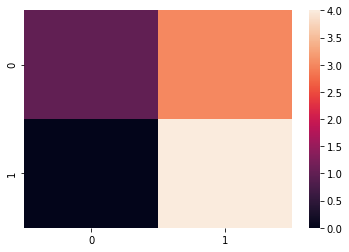

In [39]:
sb.heatmap(pd.DataFrame(confusion_matrix(ytrue,ypred)))     #heatmap
plt.show()

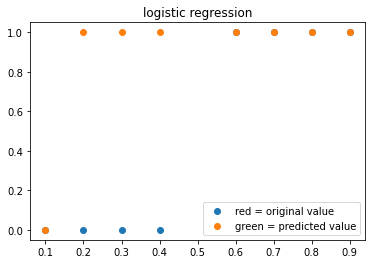

In [40]:
import matplotlib
from matplotlib import pyplot as plt
x=df['x']
ytrue=df['y']
ypred=ypred

plt.scatter(x, ytrue, label='red = original value')
plt.scatter(x, ypred, label='green = predicted value')
plt.title('logistic regression')
plt.legend()
plt.show()